In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=3c914de8d1b79bf7a70f036372f5c6a0e3d9e55e792f7ee7b7cb987edaf1c16c
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tpot import TPOTRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/I1/bismillah_fiks.csv')
df

,Product ID,Qty,Posting Date Inbound,Posting Date Outbound
0,92248141,12,2022-05-11,2022-05-11
1,92248142,6,2022-05-11,2022-05-11
2,92248143,1,2022-05-11,2022-05-11
3,92248144,5,2022-05-11,2022-05-11
4,92248144,5,2022-05-11,2022-05-11
...,...,...,...,...
42892,92282037,1,2022-10-31,2022-10-31
42893,92282040,36,2022-10-31,2022-10-31
42894,92282041,12,2022-10-31,2022-10-31
42895,92282042,3,2022-10-31,2022-10-31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42897 entries, 0 to 42896
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Product ID             42897 non-null  int64 
 1   Qty                    42897 non-null  int64 
 2   Posting Date Inbound   42897 non-null  object
 3   Posting Date Outbound  42897 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.3+ MB


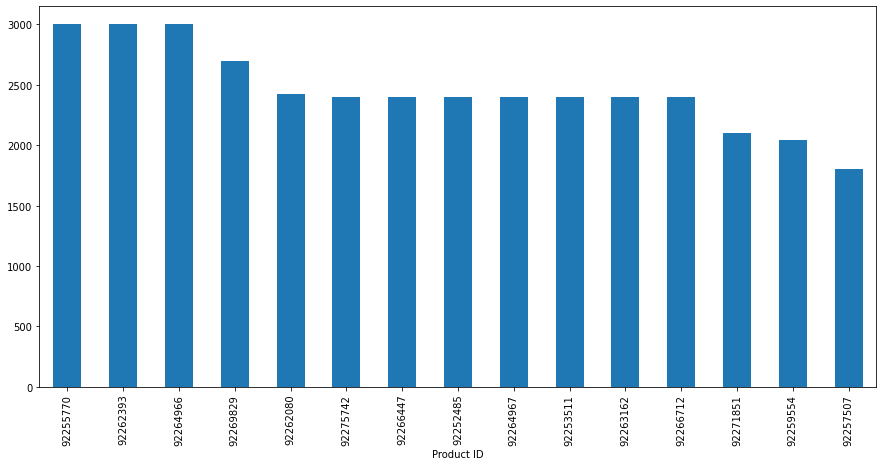

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.ticklabel_format(style='plain')
df.groupby('Product ID')['Qty'].sum().sort_values(ascending=False).head(15).plot.bar(ax=ax);

In [ ]:
df[["Posting Date Inbound", "Posting Date Outbound"]] = df[["Posting Date Inbound", "Posting Date Outbound"]].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42897 entries, 0 to 42896
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product ID             42897 non-null  int64         
 1   Qty                    42897 non-null  int64         
 2   Posting Date Inbound   42897 non-null  datetime64[ns]
 3   Posting Date Outbound  42897 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 1.3 MB


In [ ]:
df['Range'] = df['Posting Date Outbound'] - df['Posting Date Inbound']
df

,Product ID,Qty,Posting Date Inbound,Posting Date Outbound,Range
0,92248141,12,2022-05-11,2022-05-11,0 days
1,92248142,6,2022-05-11,2022-05-11,0 days
2,92248143,1,2022-05-11,2022-05-11,0 days
3,92248144,5,2022-05-11,2022-05-11,0 days
4,92248144,5,2022-05-11,2022-05-11,0 days
...,...,...,...,...,...
42892,92282037,1,2022-10-31,2022-10-31,0 days
42893,92282040,36,2022-10-31,2022-10-31,0 days
42894,92282041,12,2022-10-31,2022-10-31,0 days
42895,92282042,3,2022-10-31,2022-10-31,0 days


In [ ]:
df['Range'].value_counts()

1 days     19346
0 days     11148
-1 days     6731
2 days      3605
-2 days     1036
3 days       739
-3 days      219
33 days       62
11 days        3
9 days         2
4 days         2
7 days         2
6 days         1
14 days        1
Name: Range, dtype: int64

In [ ]:
df = df.drop(['Posting Date Inbound', 'Posting Date Outbound'], axis=1)
df

,Product ID,Qty,Range
0,92248141,12,0 days
1,92248142,6,0 days
2,92248143,1,0 days
3,92248144,5,0 days
4,92248144,5,0 days
...,...,...,...
42892,92282037,1,0 days
42893,92282040,36,0 days
42894,92282041,12,0 days
42895,92282042,3,0 days


In [ ]:
df['Range'] = (df['Range'] / np.timedelta64(1, 'D')).astype('float64')
print(df['Range'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
42892    0.0
42893    0.0
42894    0.0
42895    0.0
42896    0.0
Name: Range, Length: 42897, dtype: float64


In [ ]:
df['Range'].value_counts()

 1.0     19346
 0.0     11148
-1.0      6731
 2.0      3605
-2.0      1036
 3.0       739
-3.0       219
 33.0       62
 11.0        3
 9.0         2
 4.0         2
 7.0         2
 6.0         1
 14.0        1
Name: Range, dtype: int64

In [ ]:
df['Range'] = df['Range'].astype('int64')
df

,Product ID,Qty,Range
0,92248141,12,0
1,92248142,6,0
2,92248143,1,0
3,92248144,5,0
4,92248144,5,0
...,...,...,...
42892,92282037,1,0
42893,92282040,36,0
42894,92282041,12,0
42895,92282042,3,0


In [ ]:
X = df.drop('Range', axis=1)
y = df['Range']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.72, test_size=0.28, random_state=55)

In [ ]:
tpot = TPOTRegressor(generations=5, scoring='r2', population_size=50, verbosity=2)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9629803169306577

Generation 2 - Current best internal CV score: 0.9629846192990923

Generation 3 - Current best internal CV score: 0.9665973231280608

Generation 4 - Current best internal CV score: 0.9727367621875235

Generation 5 - Current best internal CV score: 0.975026882126226

Best pipeline: RandomForestRegressor(MinMaxScaler(SGDRegressor(input_matrix, alpha=0.001, eta0=0.1, fit_intercept=True, l1_ratio=1.0, learning_rate=constant, loss=huber, penalty=elasticnet, power_t=50.0)), bootstrap=True, max_features=0.7500000000000001, min_samples_leaf=5, min_samples_split=9, n_estimators=100)


TPOTRegressor(generations=5, population_size=50, scoring='r2', verbosity=2)

In [ ]:
print(tpot.score(X_test, y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


0.9650675835721372


In [ ]:
train_pred = tpot.predict(X_train)
train_mse = mean_squared_error(train_pred, y_train)
print('Train RMSE is %.2f' % sqrt(train_mse))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


Train RMSE is 0.14


In [ ]:
test_pred = tpot.predict(X_test)
test_mse = mean_squared_error(test_pred, y_test)
print('Test RMSE is %.2f' % sqrt(test_mse))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


Test RMSE is 0.27


In [ ]:
res = tpot.predict([[92269179, 12]])
pd.DataFrame(res.round())

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


,0
0,1.0


In [ ]:
from datetime import datetime, timedelta

def calculate_outbound_date(product_id, qty, inbound_date):
  res = int(tpot.predict([[product_id, qty]])[0])
  date = datetime.strptime(inbound_date, "%Y-%m-%d")
  outbound_date = date + timedelta(days=res)
  return outbound_date

print('Date outbound:', calculate_outbound_date(92269179, 15, "2022-05-11"))

Date outbound: 2022-05-11 00:00:00


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# import pickle

# filename = "tpot.pkl"

# # save model
# pickle.dump(tpot.fitted_pipeline_, open(filename, "wb"))

# # load model
# loaded_model = pickle.load(open(filename, "rb"))

In [ ]:
# loaded_model.predict([[92269179, 12]])

In [ ]:
# df.to_csv(r'dataset.csv', index=False)